In [7]:
#importing Libraries and our DataFrame(by pd)
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt

In [25]:
#Gathering the Data
df1 = pd.read_csv('twitter-archive-enhanced.csv')
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", "wb") as file:
    file.write(response.content)

print("Download complete!")
df2 =pd.read_csv('image_predictions.tsv', sep='\t')

Download complete!


In [28]:
# Initialize a list to store tweet data
tweet_data = []

# Open and read the local file
with open('tweet-json.txt', 'r', encoding='utf-8') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_id = tweet.get('id')
            retweet_count = tweet.get('retweet_count', 0)
            favorite_count = tweet.get('favorite_count', 0)
            tweet_data.append({
                'tweet_id': tweet_id,
                'retweet_count': retweet_count,
                'favorite_count': favorite_count
            })
        except json.JSONDecodeError:
            print("Skipping a line due to JSON error.")

# Create DataFrame
df3 = pd.DataFrame(tweet_data)
print(df3.head())


             tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048


In [10]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
# Cleaning DataFrames
df1 =  df1.isnull().sum().sum()
print(df1)

20915


In [18]:
df1.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,2278
in_reply_to_user_id,2278
timestamp,0
source,0
text,0
retweeted_status_id,2175
retweeted_status_user_id,2175
retweeted_status_timestamp,2175
expanded_urls,59


In [21]:
df2 =  df2.isnull().sum().sum()
print(df2)

0


In [22]:
df3 =  df3.isnull().sum().sum()
print(df3)

0


In [23]:
sum(df1.duplicated())

0

In [26]:
sum(df2.duplicated())

0

In [29]:
sum(df3.duplicated())

0

In [30]:
merged = pd.merge(df1, df2, on='tweet_id', how='inner')
merged_final = pd.merge(merged, df3, on='tweet_id', how='inner')

merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        1496 non-null   object 
 13  doggo                       80 no

In [31]:
# Then you cleaned it like this:
merged_final.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,2050
in_reply_to_user_id,2050
timestamp,0
source,0
text,0
retweeted_status_id,1994
retweeted_status_user_id,1994
retweeted_status_timestamp,1994
expanded_urls,0


In [34]:
merged_final.isnull().sum().sum()

np.int64(18618)

In [37]:
# cleaning merged here
merged_final.dropna(axis=1 ,inplace=True)

In [38]:
#check that after cleaning the data is here and not deleted
merged_final.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,7.383634e+17,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02,2976.089243,8556.718283
std,6.780118e+16,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02,5054.897526,12098.640994
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,6.764706e+17,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,634.000000,1674.000000
50%,7.119681e+17,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,1408.000000,3864.000000
75%,7.931959e+17,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,3443.000000,10937.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [39]:
merged_final.isnull().sum().sum()

np.int64(0)

In [41]:
merged_final.to_csv("twitter_archive_master.csv", index=False)

from google.colab import files
files.download("twitter_archive_master.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
master = pd.read_csv('twitter_archive_master.csv')

In [43]:
master.isnull().sum()

,0
tweet_id,0
timestamp,0
source,0
text,0
expanded_urls,0
rating_numerator,0
rating_denominator,0
jpg_url,0
img_num,0
p1,0


In [44]:
master.isnull().sum().sum()

np.int64(0)

In [45]:
sum(master.duplicated())

0

In [46]:
def do_nothing():
# Create a histogram of retweet counts
  plt.figure(figsize=(10, 5))
  plt.hist(master['tweet_id'], bins=30, color='#2E86C1', edgecolor='black')
  plt.title('Distribution of tweet_ids for Rated Dogs')
  plt.xlabel('tweet_ids')
  plt.ylabel('Number of Tweets')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()

# Save the figure
  plt.savefig('retweet_hist.png')
  plt.show()

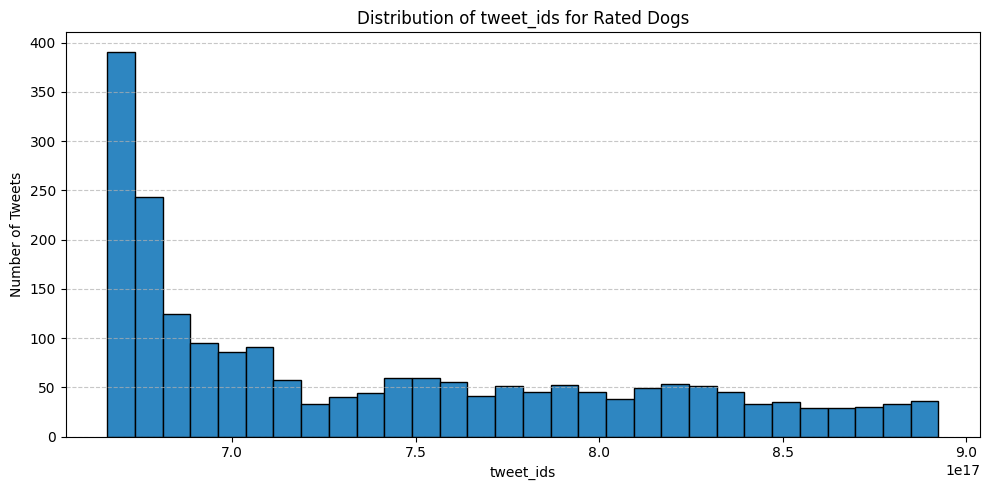

In [47]:
do_nothing()

In [48]:
#-insights section
print('After importing Libraries and our DataFrame(by pd), I started viewing the information and values of our DataFrame,')
print('I gathered the data in the tree colabs then cleaned each one alone to make change this tidy,dirty datas into a clean data ,usable, readable for the reader and the reviewer and useful one,')
print('then I started searching for missing and duplicated data(zero) and replacing or get rid of it to get usable data,')
print('I made visualizations for the dataframe to make its viewing easier in one function(do_nothing).')

After importing Libraries and our DataFrame(by pd), I started viewing the information and values of our DataFrame,
I gathered the data in the tree colabs then cleaned each one alone to make change this tidy,dirty datas into a clean data ,usable, readable for the reader and the reviewer and useful one,
then I started searching for missing and duplicated data(zero) and replacing or get rid of it to get usable data,
I made visualizations for the dataframe to make its viewing easier in one function(do_nothing).
